In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import os

In [103]:
def get_dataframe(filename, path='results'):
    with open(os.path.join(path,filename)) as file:
        data = file.read()
    filename_info = filename.split('.')[0].split('_')
    df = pd.read_json(data[:-1].replace("'", '"').replace('True', '"True"').replace('False', '"False"'), lines=True)
    df = df.replace({'solved': {'True': True, 'False': False}}).astype({'time':np.float32, 'solved':'bool'})
    df['problem']=filename_info[-2]
    return df

def get_dataframes(path='results'):
    filenames = os.listdir(path)
    df = pd.concat([get_dataframe(filename, path) for filename in filenames], axis=0)
    return df

In [104]:
df = get_dataframes(path='results')
df.head()

,filename,time,solver,solved,problem
0,nqueens_128,16.007700,nmcs-1,True,nqueens
1,nqueens_192,20.069571,nmcs-1,True,nqueens
2,nqueens_32,0.587450,nmcs-1,True,nqueens
3,nqueens_64,0.213520,nmcs-1,True,nqueens
4,nqueens_256,12.998340,nmcs-1,True,nqueens


In [96]:
df['solver'].value_counts()

nmcs-1                 90
backtracking           90
nrpa-1-100-heur        90
nrpa-1-100-heur-old    82
nmcs-2                  8
Name: solver, dtype: int64

In [97]:
df['problem'].value_counts()

coloring              144
sudoku                120
nqueens-sym            32
nqueens-sym-simple     32
nqueens                32
Name: problem, dtype: int64

In [98]:
df.dtypes

filename     object
time        float32
solver       object
solved         bool
problem      object
dtype: object

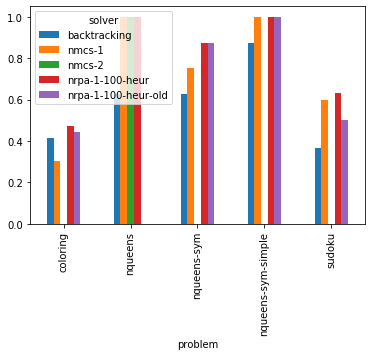

In [105]:
df.groupby(['problem', 'solver'])['solved'].mean().unstack().plot.bar()

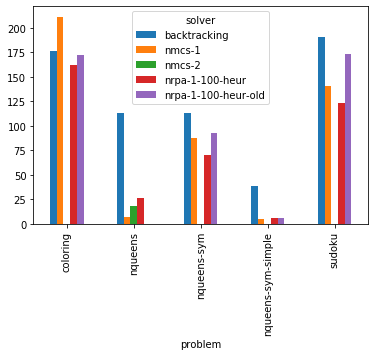

In [106]:
df.groupby(['problem', 'solver'])['time'].mean().unstack().plot.bar()

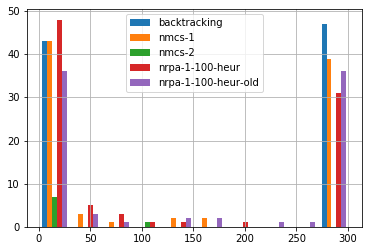

In [107]:
times_dist = df.groupby('solver')['time'].apply(list)
times_dist.hist(bins = 10)
plt.legend(times_dist.index)

In [102]:
df

,filename,time,solver,solved,problem
0,nqueens_128,16.007700,nmcs-1,True,nqueens
1,nqueens_192,20.069571,nmcs-1,True,nqueens
2,nqueens_32,0.587450,nmcs-1,True,nqueens
3,nqueens_64,0.213520,nmcs-1,True,nqueens
4,nqueens_256,12.998340,nmcs-1,True,nqueens
...,...,...,...,...,...
3,nqueens_64,7.097340,nmcs-1,True,nqueens-sym
4,nqueens_256,300.033142,nmcs-1,False,nqueens-sym
5,nqueens_16,0.161070,nmcs-1,True,nqueens-sym
6,nqueens_96,45.135830,nmcs-1,True,nqueens-sym
